
# Digitalización de una Señal Analógica

---
## Introducción
### 1. ¿Qué es una señal analógica?

Una señal analógica es continua en el tiempo y puede tomar un rango infinito de valores. Por ejemplo, un sensor de temperatura genera una señal analógica que varía en función de la temperatura medida en un entorno. Esta señal podría ser un voltaje que oscila de manera continua entre, digamos, 0 V y 5 V, dependiendo de la temperatura (por ejemplo, 0 V para 0°C y 5 V para 100°C).

### 2. ¿Por qué necesitamos digitalizar la señal?

Los sistemas digitales (como computadoras y microcontroladores) no pueden procesar señales analógicas directamente. Necesitamos convertir la señal analógica en datos digitales (una secuencia de ceros y unos) para que pueda ser utilizada por dispositivos electrónicos y sistemas de procesamiento de datos.


----

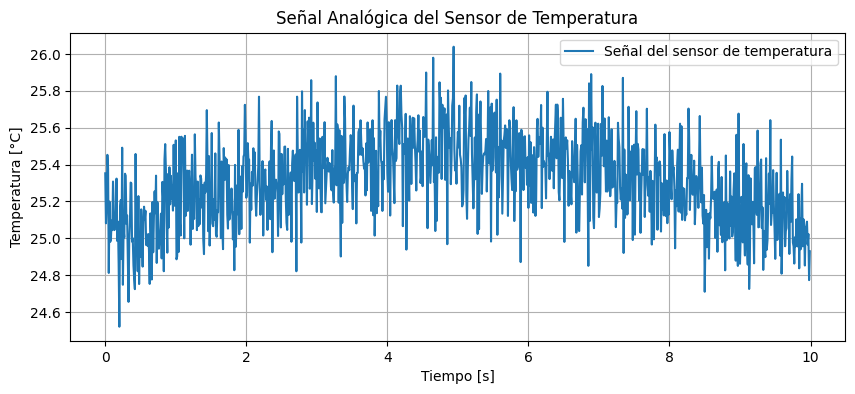

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# SIMULACIÓN DE SEÑAL ANALÓGICA EN UN SENSOR DE TEMPERATURA
fs = 100  # Frecuencia de muestreo (100 Hz)
t = np.arange(0, 10, 1/fs)  # Vector de tiempo - 10 segundos

np.random.seed(0)
temperature_signal = 25 + 0.5 * np.sin(0.1 * np.pi * t) + 0.2 * np.random.randn(len(t))

# Visualizar la señal simulada
plt.figure(figsize=(10, 4))
plt.plot(t, temperature_signal, label='Señal del sensor de temperatura')
plt.title("Señal Analógica del Sensor de Temperatura")
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.grid()
plt.legend()
plt.show()



## Pasos en la Digitalzación de una Señal Analógica

---


### **Muestreo de la Señal**
El **muestreo** es el proceso de tomar "fotografías" de la señal analógica en **intervalos de tiempo regulares**. Cada muestra representa el valor de la señal en ese instante. Esto se realiza a una tasa llamada **frecuencia de muestreo** (medida en muestras por segundo o Hertz).

Vamos a muestrear la señal a diferentes frecuencias y observar cómo afecta la calidad de la señal digitalizada.


**Ejemplo**:
- Imagina que tenemos un sensor de temperatura que produce una señal analógica que varía lentamente.
- Si muestreamos esta señal a **1.000 muestras por segundo (1 kHz)**, significa que tomamos una muestra del voltaje que genera el sensor cada milisegundo.
- La elección de la **frecuencia de muestreo** depende de la **naturaleza de la señal analógica** y de su **frecuencia máxima** según el **teorema de Nyquist** (debe ser al menos el doble de la frecuencia máxima presente en la señal para evitar el **aliasing**).


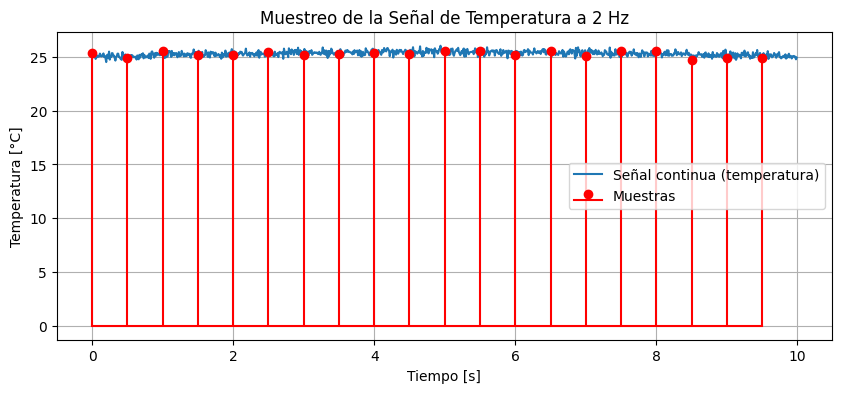

In [2]:
# Parámetros de muestreo
sample_rate = 2  # Frecuencia de muestreo deseada (2 Hz)
sample_period = int(fs / sample_rate)
sampled_temperature = temperature_signal[::sample_period]
sampled_time = t[::sample_period]

# Visualización de la señal muestreada
plt.figure(figsize=(10, 4))
plt.plot(t, temperature_signal, label='Señal continua (temperatura)')
plt.stem(sampled_time, sampled_temperature, linefmt='r-', markerfmt='ro', basefmt='r-', label='Muestras')
plt.title("Muestreo de la Señal de Temperatura a 2 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.grid()
plt.legend()
plt.show()


---

### **Cuantización de la Señal Muestreada**
La **cuantización** es el proceso de convertir los valores continuos de las muestras obtenidas en el paso anterior a **niveles discretos**. Esto significa que se redondean los valores de las muestras a los niveles más cercanos dentro de un conjunto predefinido.

**Ejemplo**:
- Supongamos que nuestro rango de voltaje es de **0 V a 5 V**, y decidimos usar un convertidor A/D (analógico a digital) con **8 bits** de resolución.
- Con **8 bits**, podemos representar **256 niveles (2^8)**. Esto significa que el rango completo de voltaje se divide en 256 intervalos.
- Si una muestra tiene un valor analógico de **2.35 V**, se redondeará al nivel más cercano en este rango cuantizado.


**Errores en la cuantización**:
- El proceso de redondeo introduce un **error de cuantización**, que es la diferencia entre el valor real de la señal y el nivel cuantizado.
- Cuanto **mayor sea la resolución (número de bits)**, menor será el error de cuantización, ya que tendremos más niveles disponibles para representar la señal.

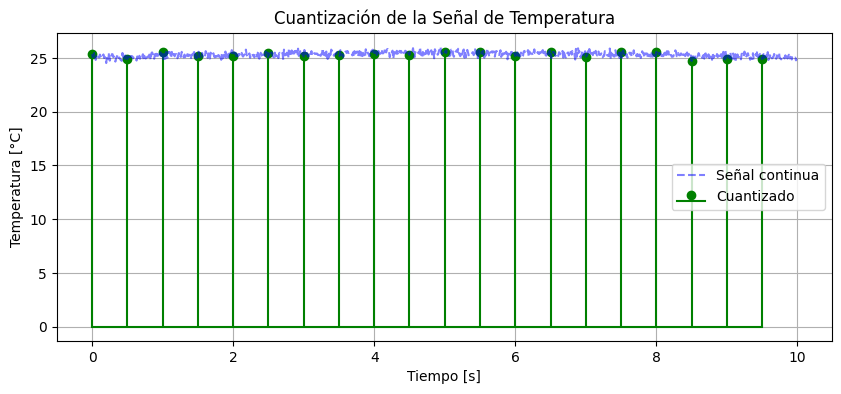

In [3]:

def quantize(signal, bits, v_min, v_max):
    levels = 2 ** bits
    scaled_signal = (signal - v_min) / (v_max - v_min) * (levels - 1)
    quantized_signal = np.round(scaled_signal)
    return quantized_signal / (levels - 1) * (v_max - v_min) + v_min

# Cuantizar la señal muestreada
bits, v_min, v_max  = 8, 0, 5
quantized_temperature = quantize(sampled_temperature, bits, v_min, v_max)

# Visualización de la señal cuantizada
plt.figure(figsize=(10, 4))
plt.stem(sampled_time, quantized_temperature, linefmt='g-', markerfmt='go', basefmt='g-', label='Cuantizado')
plt.plot(t, temperature_signal, 'b--', alpha=0.5, label='Señal continua')
plt.title("Cuantización de la Señal de Temperatura")
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.grid()
plt.legend()
plt.show()


### **Codificación en Binario**
La **codificación** es el paso donde los niveles cuantizados se convierten en **números binarios** para ser interpretados y procesados por sistemas digitales.

**Ejemplo**:
- Si, después de la cuantización, obtenemos un nivel de **152** en un rango de 0 a 255, ese nivel se codifica como el número binario **10011000**.
- Este número binario es lo que finalmente se transmite, almacena o procesa digitalmente.



Valores cuantizados y su representación binaria:
Muestra 1: Valor cuantizado = 25.35, Binario = 10100001101
Muestra 2: Valor cuantizado = 24.90, Binario = 10011110110
Muestra 3: Valor cuantizado = 25.53, Binario = 10100010110
Muestra 4: Valor cuantizado = 25.22, Binario = 10100000110
Muestra 5: Valor cuantizado = 25.22, Binario = 10100000110


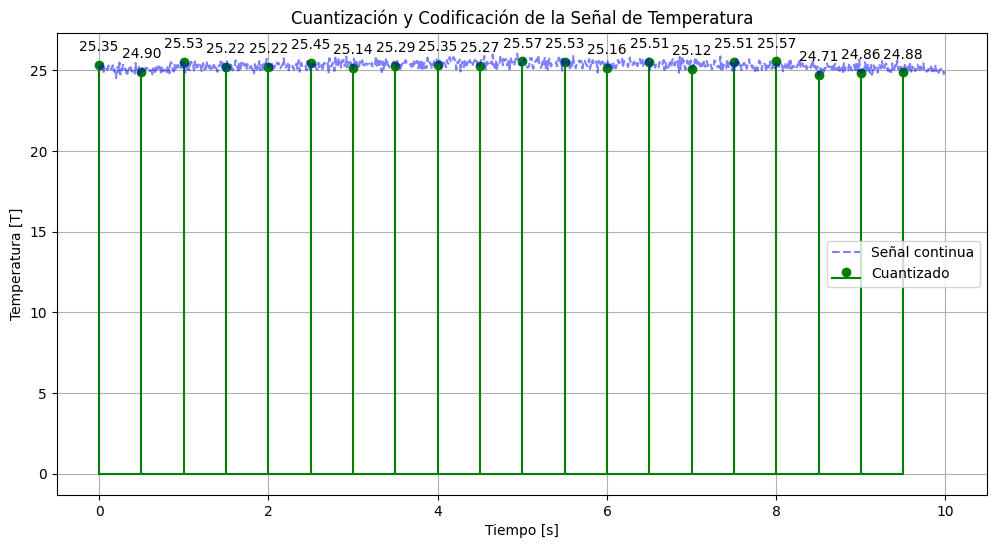

In [6]:
def encode_to_binary(quantized_signal, bits, v_min, v_max):
    """
    Función para codificar una señal cuantizada a binario.
    quantized_signal: Señal cuantizada.
    bits: Número de bits de resolución (e.g., 8 bits).
    v_min: Voltaje mínimo (rango).
    v_max: Voltaje máximo (rango).
    """
    levels = 2 ** bits
    # Escalar la señal al rango de niveles enteros
    scaled_signal = (quantized_signal - v_min) / (v_max - v_min) * (levels - 1)
    scaled_signal = np.round(scaled_signal).astype(int)  # Convertir a enteros
    
    # Convertir cada nivel a su representación binaria
    binary_codes = [format(value, f'0{bits}b') for value in scaled_signal]
    return binary_codes

# Codificar la señal cuantizada a binario
binary_codes = encode_to_binary(quantized_temperature, bits, v_min, v_max)

# Mostrar los primeros 10 valores codificados
print("Valores cuantizados y su representación binaria:")
for i in range(5):
    print(f"Muestra {i+1}: Valor cuantizado = {quantized_temperature[i]:.2f}, Binario = {binary_codes[i]}")


plt.figure(figsize=(12, 6))
plt.stem(sampled_time, quantized_temperature, linefmt='g-', markerfmt='go', basefmt='g-', label='Cuantizado')
plt.plot(t, temperature_signal, 'b--', alpha=0.5, label='Señal continua')
plt.title("Cuantización y Codificación de la Señal de Temperatura")
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [T]")
plt.legend()
plt.grid()

for i, txt in enumerate(quantized_temperature[:20]):
    plt.annotate(f"{txt:.2f}", (sampled_time[i], quantized_temperature[i]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.show()